## **Import Libraries**

In [310]:
# imort libraries
import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler

## **Load Data**

In [170]:
# Load the ARFF file
with open('php50jXam.arff', 'r') as f:
    data = arff.load(f)

# Convert to a pandas DataFrame
df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

# Display the DataFrame
print(df.head())

        V1      V2      V3       V4 Class
0  3.62160  8.6661 -2.8073 -0.44699     1
1  4.54590  8.1674 -2.4586 -1.46210     1
2  3.86600 -2.6383  1.9242  0.10645     1
3  3.45660  9.5228 -4.0112 -3.59440     1
4  0.32924 -4.4552  4.5718 -0.98880     1


## **Data Cleaning**

In [172]:
# check the shape
df.shape

(1372, 5)

In [173]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   object 
dtypes: float64(4), object(1)
memory usage: 53.7+ KB


## **Exploratory Data Analysis**

In [176]:
#descriptive statistics
df.describe()


,V1,V2,V3,V4
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


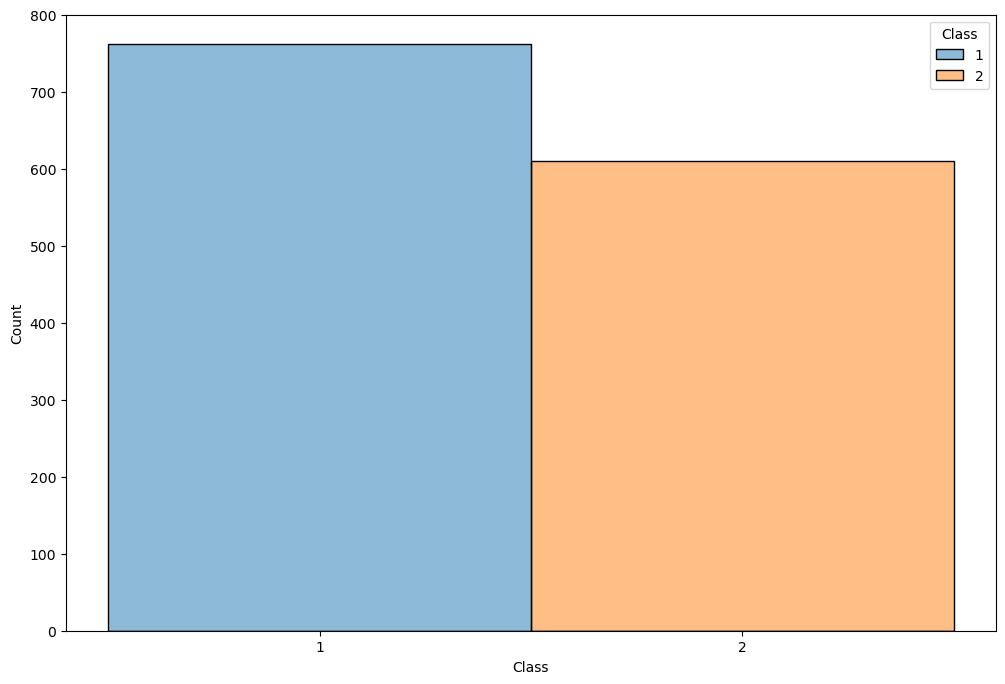

In [231]:
#distribution of the Class where '1' is for genuine and '2' is for forged
sns.histplot(df, x = 'Class', hue = 'Class', bins = 2);

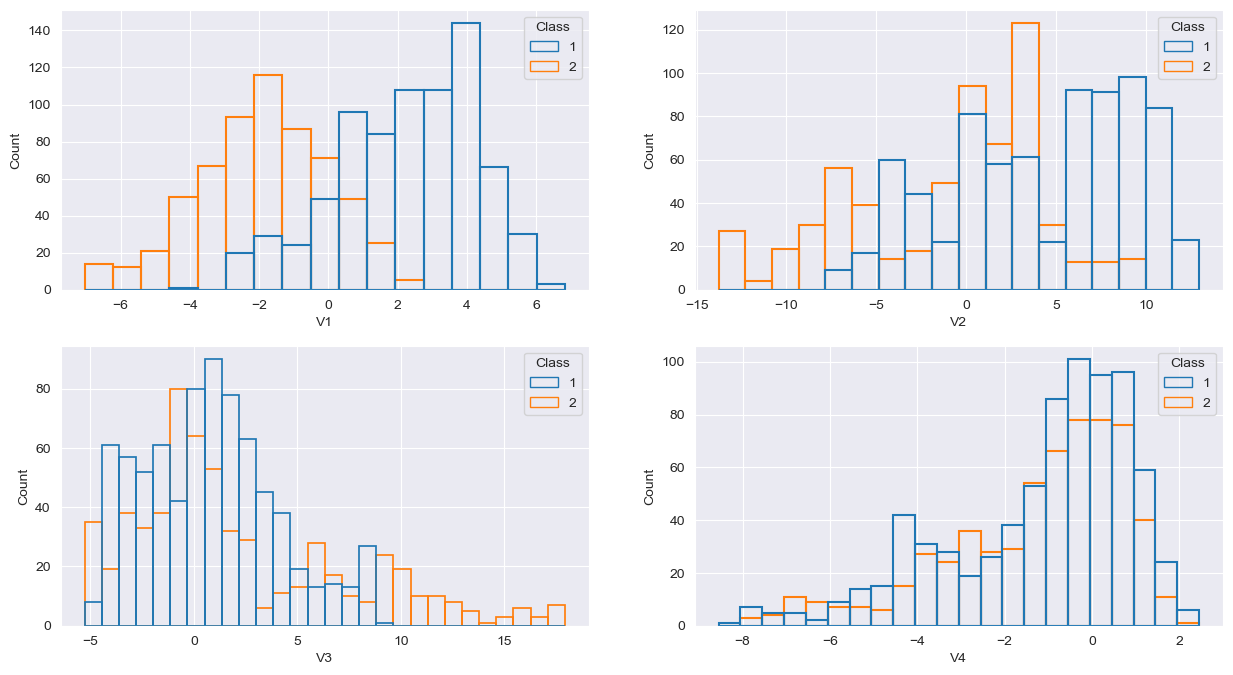

In [305]:
#Distribution of features group by class
fig, ax = plt.subplots(2, 2 , figsize = (15, 8))

sns.histplot(df,  x = 'V1', ax = ax[0,0], hue = 'Class', fill = False )

sns.histplot(df, x = 'V2' ,ax = ax[0,1], hue = 'Class', fill = False)
sns.histplot(df,  x = 'V3', ax = ax[1,0], hue = 'Class', fill= False)
sns.histplot(df, x = 'V4' , ax = ax[1,1], hue = 'Class', fill= False)
sns.set_style('darkgrid')

## **Data Preprocessing**

In [179]:
#Insantiate the Standardscaler
scaler = StandardScaler()
# fit the scaler
scaler.fit_transform(df[['V1', 'V2', 'V3', 'V4']])

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317],
       ...,
       [-1.47235682, -2.62164576,  3.75901744, -0.75488418],
       [-1.40669251, -1.75647104,  2.552043  , -0.04315848],
       [-1.04712236, -0.43982168,  0.29861555,  1.1364645 ]])

## Split Data

In [181]:
# splitting target and features variables  Class (target)  '1' for genuine and '2' for forged
target = 'Class'
features = df.drop(columns= target)
y = df[target]
X = features


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)
print("X_train is", X_train.shape)
print("X_test is", X_test.shape)
print("y_train is", y_train.shape)
print("y_test is", y_test.shape)

X_train is (960, 4)
X_test is (412, 4)
y_train is (960,)
y_test is (412,)


## **Training The LogisticRegression model**

In [184]:
# instantiate the Logistiic Regression model
log_model = LogisticRegression()
# fit the model
log_model.fit(X_train, y_train)

LogisticRegression()

In [185]:
#checking the model score on training data
score_train = log_model.score(X_train, y_train)
score_train

0.9916666666666667

In [186]:
#checking the model score on test data
score_test = log_model.score(X_test, y_test)
score_test

0.9878640776699029

# **Predictions**


In [188]:
#predict on training data
y_train_pred = log_model.predict(X_train)
y_train_pred[:5]

array(['2', '2', '1', '2', '1'], dtype=object)

In [189]:
#predict pn test data
y_test_pred = log_model.predict(X_test)
y_test_pred[:5]

array(['1', '1', '1', '1', '1'], dtype=object)

## **Model Evaluation**

In [191]:
# find the mae, r2_score, accuracy score and classification report
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
accuracyscore = accuracy_score(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)

print('MAE is', mae)
print('r2score is', r2)
print('accuracy score is', accuracyscore)
print()
print(class_report)


MAE is 0.012135922330097087
r2score is 0.9508435344930442
accuracy score is 0.9878640776699029

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       229
           2       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



## **Confusion Matrix**

In [314]:
#confusion matrix for the outcome
confusion_matrx = confusion_matrix(y_test, y_test_pred)
confusion_matrx

array([[226,   3],
       [  2, 181]], dtype=int64)

<Axes: >

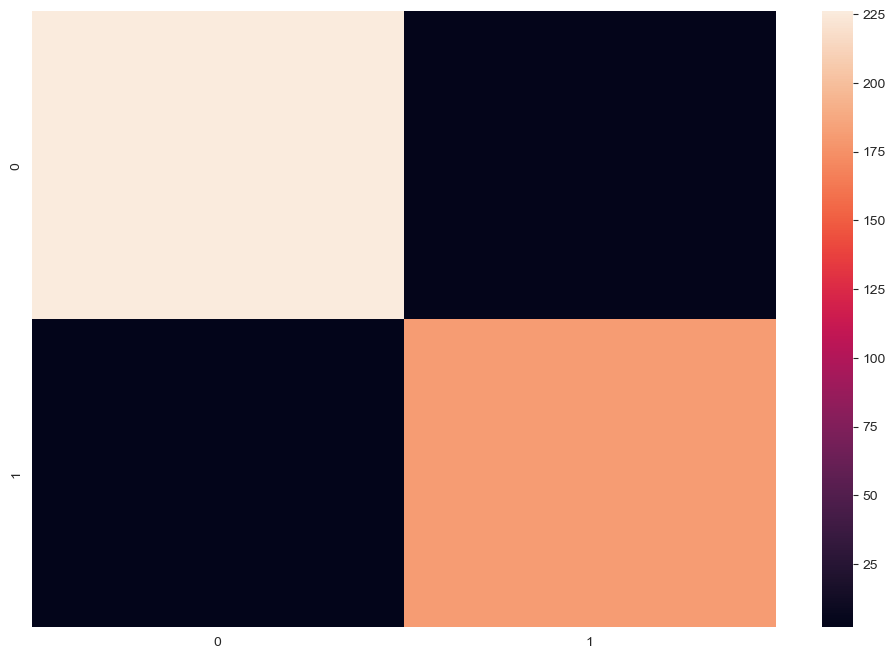

In [318]:
# a confusion matrix heatmap
sns.heatmap(confusion_matrx)

## **Feature Importance**

In [193]:
#extract feature importances
feat_imp = log_model.coef_
feat_imp

array([[-3.09539479, -1.74854572, -2.11058743, -0.07508766]])

In [194]:
#create a Data frame of  feature importances
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance':log_model.coef_[0]}).sort_values('importance', ascending  = False)
feature_importances

,feature,importance
3,V4,-0.075088
1,V2,-1.748546
2,V3,-2.110587
0,V1,-3.095395


## **Model Interpretation**

In [196]:
#extracting coefficients and intercept
coefficients = log_model.coef_
intercept = log_model.intercept_
print('Coefficients', coefficients)
print()
print('Intercept',intercept)

Coefficients [[-3.09539479 -1.74854572 -2.11058743 -0.07508766]]

Intercept [3.37971149]


In [197]:
#calculating the odds
odds_ratio = np.exp(log_model.coef_)
print("Odds_ratio", odds_ratio)

Odds_ratio [[0.04525714 0.17402684 0.12116677 0.92766216]]


## **Model Deployment**

In [ ]:
#Load new data
new_df = pd.read_csv('new_file.csv')

# predict on new data
predictions = log_model.predict(new_data_test)

#Save predictions to a file
np.savetxt('predictions.txt', predictions, fmt = %d)


**Thank you, comments and improvements to this project are most welcome**